<a href="https://colab.research.google.com/github/vaishnavikondaparthy/MachineLearning/blob/main/1.2_ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('/content/heart_cleveland_upload.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [7]:
X = data.drop('condition', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [8]:
y = data['condition']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter  = 1000, random_state=42)

In [11]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
y_test_predicted = lr.predict(X_test)

In [13]:
y_test_predicted

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0])

In [14]:
lr.classes_

array([0, 1])

In [15]:
cm = confusion_matrix(y_test, y_test_predicted, labels = lr.classes_)
print(cm)

[[30  4]
 [ 8 33]]


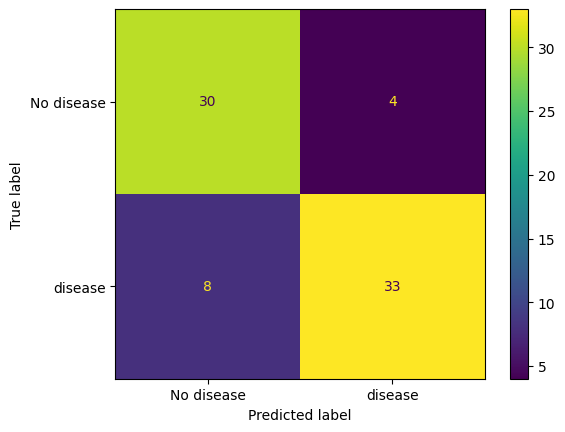

In [16]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['No disease','disease'])
cm_disp.plot()